##### Feature Selection 

    EDA 
    
        Exploratory Data Analysis
        

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = sns.load_dataset('titanic')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [16]:
df.groupby('sex').agg({'survived': 'value_counts'}).T

sex      female     male     
survived      1   0    0    1
survived    233  81  468  109

In [19]:
fe = 233 / 314 # normal -> 
ml = 109 / 577 # uniform -> 

In [20]:
print("Female Survial Percentage: ", fe)
print("Male Survial Percentage: ", ml)

Female Survial Percentage:  0.7420382165605095
Male Survial Percentage:  0.18890814558058924


In [25]:
df['alone'].value_counts()

True     537
False    354
Name: alone, dtype: int64

In [24]:
df.groupby(['alone', 'survived'])['pclass',].count()

pclass
alone survived        
False 0            175
      1            179
True  0            374
      1            163

In [27]:
print(163 /  573)

0.2844677137870855


Evaluation 

    Metrices 
    
        Regression --> Mean Absolute Error, Mean Squared Error, R2 Score

    tss - rss -> explained variance by model

### Cross Validation and Hyper Paramter Tunining

In [28]:
def model_report(models, X_train, X_test, y_train, y_test):
    for name, model in models:
        model.fit(X_train, y_train)
        y_hat_train = model.predict(X_train)
        y_hat_test  = model.predict(X_test)
        print("_"*80)
        print(f"Report For {name}".center(80))
        print()
        print(f"Training RMSE Error: {rmse(y_train, y_hat_train):.2f}" )
        print(f"Test     RMSE Error: {rmse(y_test, y_hat_test):.2f}")
        print()
        print(f"Training Accuracy: {r2_score(y_train, y_hat_train):.2f}")
        print(f"Test     Accuracy: {r2_score(y_test, y_hat_test):.2f}")
        print('\n\n')

#### Steps to ML Project 

    1. Problem Understanding / Look at the Big Picture
    2. Load Data
    3. EDA & Feature Engineering
    4. Data Transformation Pipline / Preparing Data For ML Model
    5. Select and Train Your Model / Hypothesis function eg. y = H(x) = b + wx
    6. Evaluation of Model / Error metric / accuracy metric eg. MSE, RMSE, R2 Score
    7. Fine Tunining Model 
    8. Deploy & Maintain

#### jupyter shortcut

    indent -> ctrl + ] 
    
    dedent -> ctrl + [

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
# to scale numerical values
from sklearn.impute import SimpleImputer
# to impute missing values in Data
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# to convert categorical features into numberical feature

from sklearn.pipeline import Pipeline
# to build a data preprocessing pipeline
from sklearn.compose import ColumnTransformer
import os



from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error, r2_score

from sklearn.base import BaseEstimator, TransformerMixin

class Add_Features(BaseEstimator, TransformerMixin):
    def __init__(self, add_rooms=True): 
        self.add_rooms = add_rooms # add_rooms -> is hyper parameter tunining
        self.ln  = 0 # longitude index
        self.lt  = 1 # latitude index
        self.pop = 5 # population index
        self.hs  = 6 # households
        self.rm  = 3 # total rooms
        self.bd  = 4 # total bedrooms
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        ln_lat = X[:, self.ln] + X[:, self.lt]
        hs_pop = X[:, self.hs] / X[:, self.pop]
        if self.add_rooms:
            bd_rm  = X[:, self.bd] / X[:, self.rm]
            return np.c_[X, ln_lat, hs_pop, bd_rm]
        
        return np.c_[X, ln_lat, hs_pop]

def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))


        
def load_data():
    data_root_dir = "C:\\Users\\sachin\\OneDrive - Grras Solution Pvt. Ltd\\ML_BATCH_2021\\MachineLearning\\Notebooks\\datasets"
    data_path = os.path.join(data_root_dir, 'housing\housing.csv')
    housing = pd.read_csv(data_path)
    X = housing.drop(['median_house_value'], axis=1).copy()
    y = housing['median_house_value']
    return X, y



    # to randomly split data into train and test part
X, y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

num_features = [ 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

cat_features = [ 'ocean_proximity' ]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), #T1
    ('add features', Add_Features()),
    ('standard scaler', StandardScaler()), #T2
])


final_pipeline = ColumnTransformer([
    # (name, Transformer, column_list)
    ("numerical pipeline", num_pipeline, num_features),
    ("categorical pipeline", OneHotEncoder(), cat_features),
    # ("ordinal pipeline", OrdinalEncoder(), ord_features)
    # ('remove features', 'drop', drop_features),
    # ('pass throgh', 'passthrough', pass_through )
])

X_train_tr = final_pipeline.fit_transform(X_train)
X_test_tr  =  final_pipeline.transform(X_test)


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

    To check Overfitting and Underfitting
    
    
        Underfit -> model is not able to understand underlaying logic between features and targets
        
                   training accuracy is very low or training error is very high
                   
        Overfit -> model is not able to generalize better means it is performing good on training but fails on test
        
                    training accuracy is very high but test accuracy is very low
                    
                    training error is very low but test error is very high

In [38]:
import time

In [48]:
def evaluate(model, X_train, y_train, X_test, y_test):
    ts = time.monotonic()
    model.fit(X_train, y_train)
    te = time.monotonic()
    print(f"Fitting Time: {te - ts:5.2f} Seconds")
    print("\n")
    y_train_hat = model.predict(X_train)
    y_test_hat = model.predict(X_test)
    train_error = np.sqrt(mean_squared_error(y_train, y_train_hat))
    test_error  = np.sqrt(mean_squared_error(y_test, y_test_hat))
    train_acc = r2_score(y_train, y_train_hat)
    test_acc = r2_score(y_test, y_test_hat)
    
    print(f"Train Error: {train_error:.2f}")
    print(f"Test Error: {test_error:.2f}")
    
    print("\n\n")
    print(f"Train Accuracy: {train_acc:.2f}")
    print(f"Test Accuracy: {test_acc:.2f}")

In [49]:
# intial Model 
forest = RandomForestRegressor()

##### Evaluation 

    here we can see training error is about 18090 doller but test error is high 46111 doller
    so it is sign of Overfitting
    
    same result we can see on Accuracy 

In [47]:
evaluate(forest, X_train_tr, y_train, X_test_tr, y_test)

Fitting Time: -17.05 Seconds


Train Error: 18090.76
Test Error: 46111.69



Train Accuracy: 0.98
Test Accuracy: 0.84


#### Tuning Model



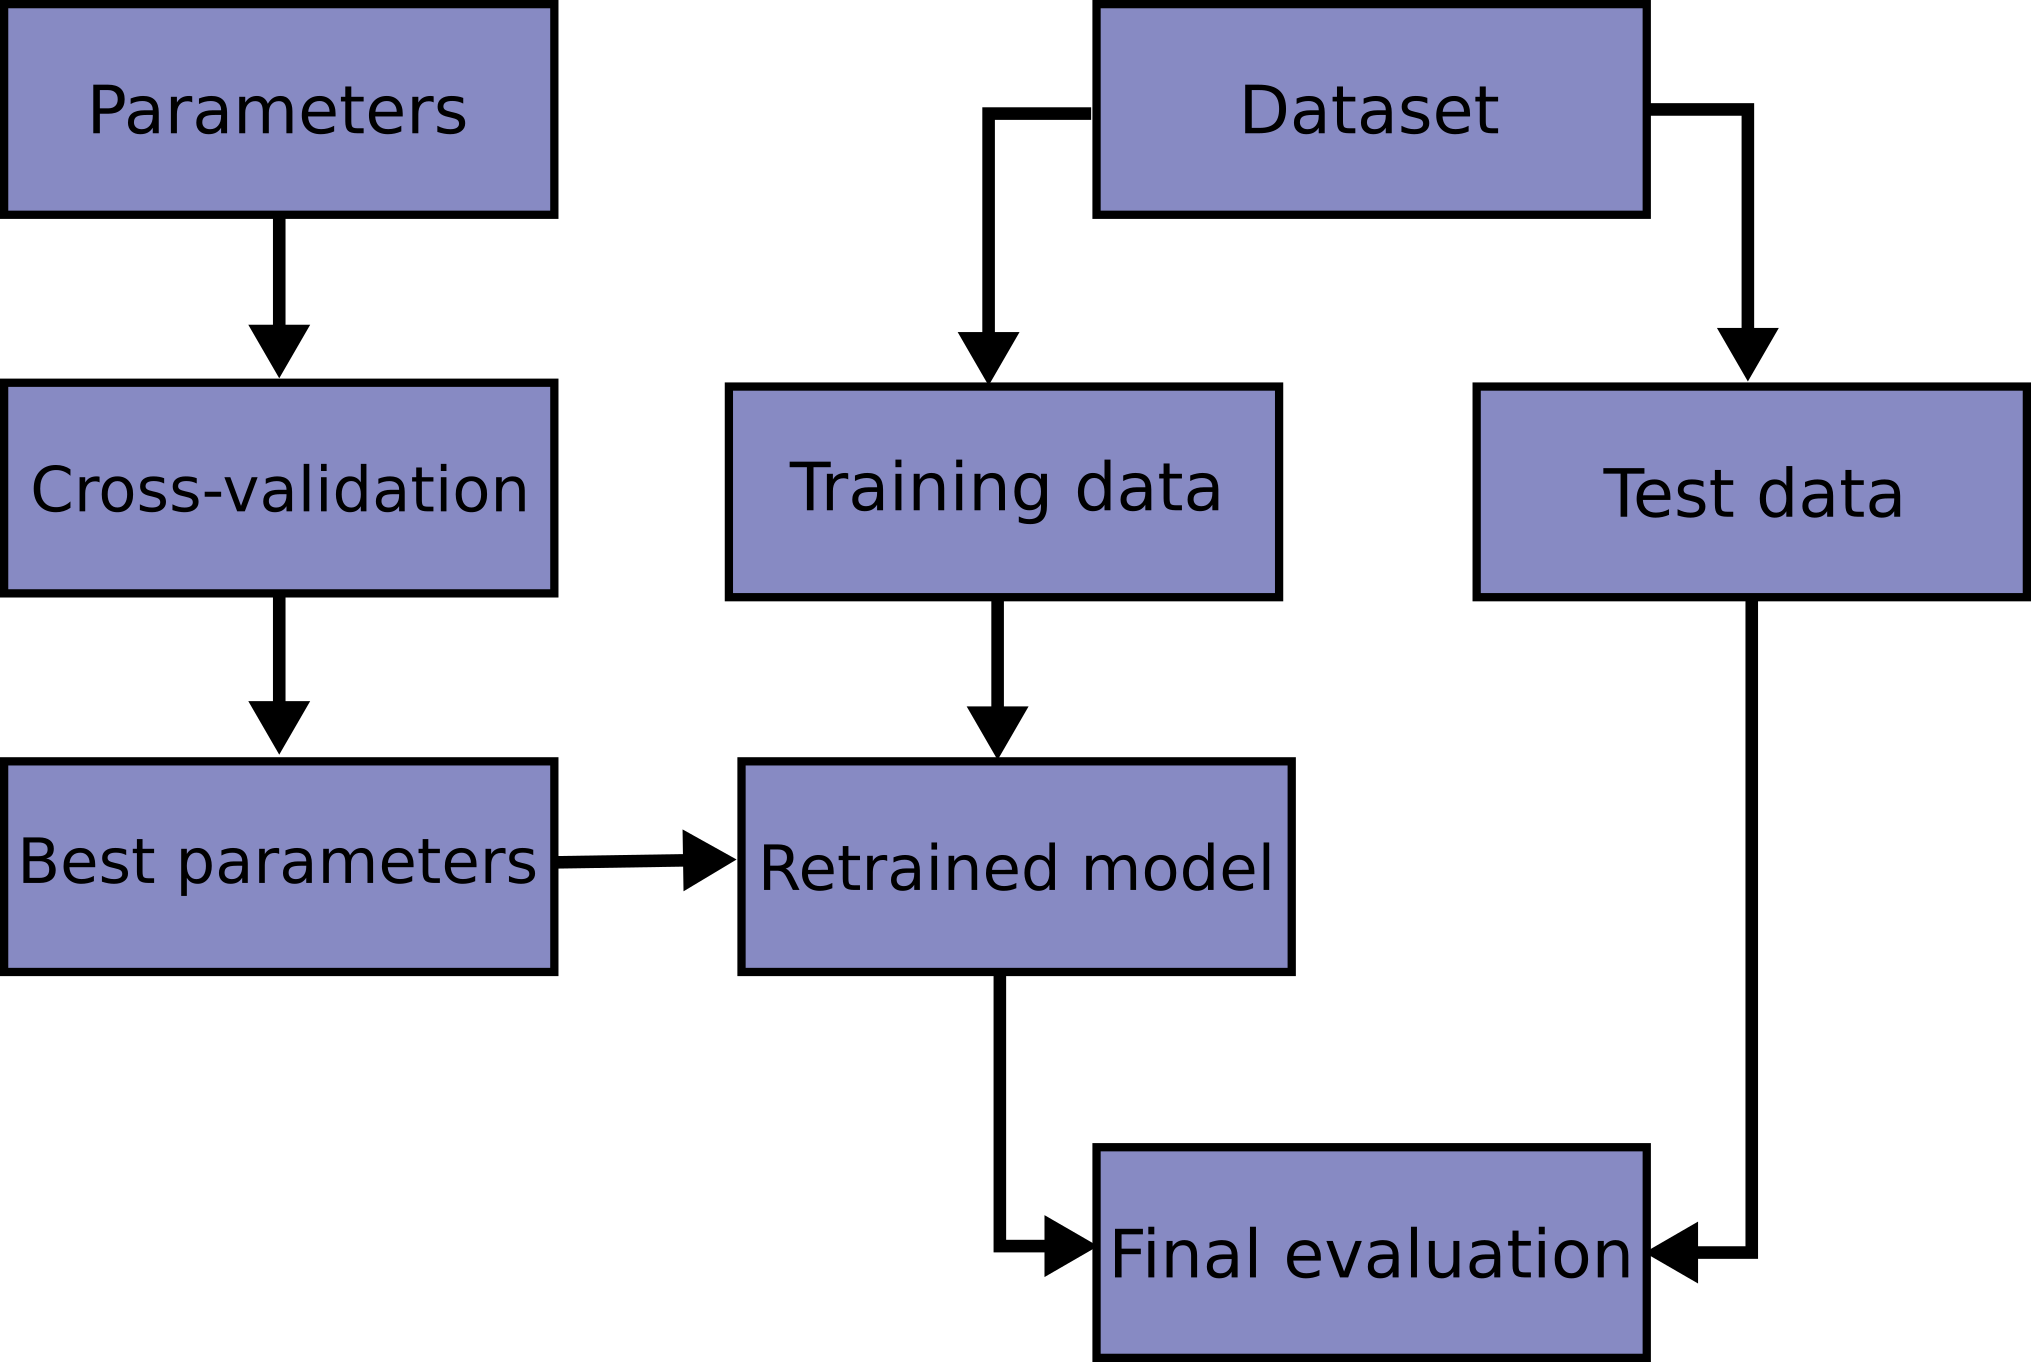

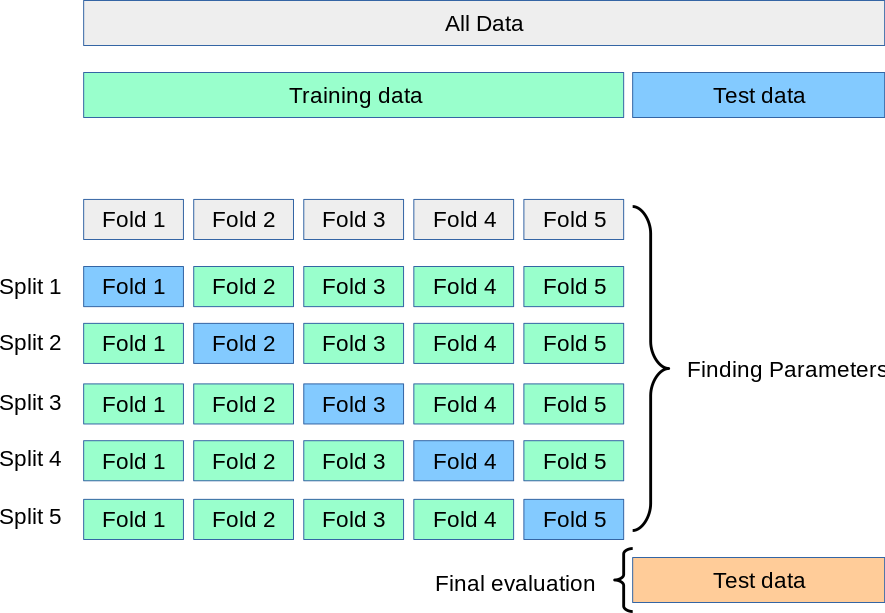

[cross validation](https://scikit-learn.org/stable/modules/cross_validation.html)

In [50]:
from sklearn.model_selection import KFold

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
folds = KFold(n_splits=5)
c = 1
for tr_ixs, ts_ixs in folds.split(X_train_tr):
    print(f"\nSplit no {c}".center(50))
    tr_X = X_train_tr[tr_ixs]
    ts_X = X_train_tr[ts_ixs]
    tr_y = y_train.values[tr_ixs]
    ts_y = y_train.values[ts_ixs]
    evaluate(RandomForestRegressor(), tr_X, tr_y, ts_X, ts_y)
    print('\n')
    print("__"*50)

                   
Split no 1                    
Fitting Time: 13.56 Seconds


Train Error: 18454.50
Test Error: 47587.02



Train Accuracy: 0.97
Test Accuracy: 0.83


____________________________________________________________________________________________________
                   
Split no 1                    
Fitting Time: 14.67 Seconds


Train Error: 18325.02
Test Error: 48522.91



Train Accuracy: 0.97
Test Accuracy: 0.82


____________________________________________________________________________________________________
                   
Split no 1                    
Fitting Time: 16.34 Seconds


Train Error: 18508.76
Test Error: 48502.86



Train Accuracy: 0.97
Test Accuracy: 0.83


____________________________________________________________________________________________________
                   
Split no 1                    
Fitting Time: 17.50 Seconds


Train Error: 18228.64
Test Error: 50377.03



Train Accuracy: 0.98
Test Accuracy: 0.81


_________________

[scoring parameters](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
model = RandomForestRegressor()


    -10

    -5

    -5 > -10

In [62]:
val_scores = cross_val_score(model, X_train_tr, y_train, cv=5, scoring="neg_mean_squared_error")
# greatest is best

In [63]:
print(val_scores)

[-2.25508523e+09 -2.36350702e+09 -2.31136638e+09 -2.55606135e+09
 -2.59288460e+09]


In [64]:
val_scores = np.sqrt(-val_scores)
val_scores

array([47487.73767432, 48615.91321264, 48076.67188256, 50557.50534612,
       50920.3751186 ])

In [66]:
val_scores[np.argmin(val_scores)]

47487.73767431909

In [67]:
val_scores.mean()

49131.640646847445

In [68]:
val_scores.std()

1364.8451937250113

### Hyper Parameter Tunining

[random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [ ]:
n_estimators = [ 10, 20, 50, 100, 500, 1000, 1200, 15000]

#  underfitting, underfitting, .......best fit............ Overfitting
# n_estimators = [ 70, 80, 90, 100, 120, 130]

max_depth = [10, 20, 50, 100, 150, 200]

In [71]:
forest = RandomForestRegressor()
evaluate(forest, X_train_tr, y_train, X_test_tr, y_test)
# overfit or underfitting

Fitting Time: 17.45 Seconds


Train Error: 17979.43
Test Error: 46360.05



Train Accuracy: 0.98
Test Accuracy: 0.84


In [72]:
forest = RandomForestRegressor(n_estimators=2)
evaluate(forest, X_train_tr, y_train, X_test_tr, y_test)
# overfit or underfitting

Fitting Time:  0.34 Seconds


Train Error: 33170.05
Test Error: 57560.47



Train Accuracy: 0.92
Test Accuracy: 0.75


In [73]:
forest = RandomForestRegressor(n_estimators=10)
evaluate(forest, X_train_tr, y_train, X_test_tr, y_test)
# overfit or underfitting

Fitting Time:  1.66 Seconds


Train Error: 21571.83
Test Error: 48022.28



Train Accuracy: 0.97
Test Accuracy: 0.83


In [75]:
forest = RandomForestRegressor(n_estimators=200, n_jobs=-1)
evaluate(forest, X_train_tr, y_train, X_test_tr, y_test)
# overfit or underfitting

Fitting Time:  9.98 Seconds


Train Error: 17928.97
Test Error: 46119.49



Train Accuracy: 0.98
Test Accuracy: 0.84


In [76]:
from sklearn.model_selection import GridSearchCV


    sparse matrix -> space saving

    one hot coding -> 25 --> 25 new columns 

### `Curse of Dimensionality`

    Test Accuracy will go high 

    Test data as a training data
    
    when you deploy model it will behave unusual 
    
    MAE -> best fit line 
    
    metric -> cost function -> 
    
                wrong prediction -> J(theta) ---> High
                
                correct prediction -> J(theta) --> Low
                
                

In [77]:
param_grid = [
    {
        'n_estimators': [ 10, 60, 100, 200, 350, 500 ],
        'max_depth': [ 5, 10, 20, 30],
        'max_features': [ 2, 4, 6],
    }, 
    
]


In [78]:
forest = RandomForestRegressor(n_jobs=-1)
# feature selection 

In [79]:
grid_search = GridSearchCV(forest, param_grid, cv=5,
                      scoring="neg_mean_squared_error", return_train_score=True)

In [80]:
grid_search.fit(X_train_tr, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid=[{'max_depth': [5, 10, 20, 30],
                          'max_features': [2, 4, 6],
                          'n_estimators': [10, 60, 100, 200, 350, 500]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [82]:
best_model = grid_search.best_estimator_

In [83]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 20, 'max_features': 6, 'n_estimators': 350}


In [87]:
result = grid_search.cv_results_

In [89]:
print(list(result.keys()))

['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score']


In [ ]:

train_scores = np.round(np.sqrt(-result['mean_train_score']), 2)
test_scores  = np.round(np.sqrt(-result['mean_test_score']), 2)
parameters = result['params']


scores = [ (tr, ts, pr) for tr, ts, pr in zip(train_scores, test_scores, parameters) ]


#### some time the best is the model which is overfitting your data so you need select one model which is a good fit 

In [117]:
strformat = "|{:<5}|{:^20}| {:^20}| {}|\n{}\n"
lb =  '_'*110
print(strformat.format("", "Training Score", "Test Score", "Parameters", lb))
for ix, (tr, ts, pr) in enumerate(scores):
    print(strformat.format(ix+1, tr, ts, pr, lb))
    

|     |   Training Score   |      Test Score     | Parameters|
______________________________________________________________________________________________________________

|1    |      17983.05      |       47063.29      | {'max_depth': 20, 'max_features': 6, 'n_estimators': 350}|
______________________________________________________________________________________________________________

|2    |      17337.24      |       47078.25      | {'max_depth': 30, 'max_features': 6, 'n_estimators': 500}|
______________________________________________________________________________________________________________

|3    |      17438.27      |       47083.98      | {'max_depth': 30, 'max_features': 6, 'n_estimators': 200}|
______________________________________________________________________________________________________________

|4    |      18270.35      |       47093.29      | {'max_depth': 20, 'max_features': 4, 'n_estimators': 200}|
_________________________________________________

In [114]:
scores.sort(key=lambda x: x[1]) # [ ( train_error, test_error, params  ), ( ) ]

In [116]:
print("Top 10 Models")
strformat = "|{:<5}|{:^20}| {:^20}| {}|\n{}\n"
lb =  '_'*110
print(strformat.format("", "Training Score", "Test Score", "Parameters", lb))
for ix, (tr, ts, pr) in enumerate(scores[:10]):
    print(strformat.format(ix+1, tr, ts, pr, lb))
    

Top 10 Models
|     |   Training Score   |      Test Score     | Parameters|
______________________________________________________________________________________________________________

|1    |      17983.05      |       47063.29      | {'max_depth': 20, 'max_features': 6, 'n_estimators': 350}|
______________________________________________________________________________________________________________

|2    |      17337.24      |       47078.25      | {'max_depth': 30, 'max_features': 6, 'n_estimators': 500}|
______________________________________________________________________________________________________________

|3    |      17438.27      |       47083.98      | {'max_depth': 30, 'max_features': 6, 'n_estimators': 200}|
______________________________________________________________________________________________________________

|4    |      18270.35      |       47093.29      | {'max_depth': 20, 'max_features': 4, 'n_estimators': 200}|
___________________________________

#### Bottom 10 Model Performance 

In [118]:
print("Top 10 Models")
strformat = "|{:<5}|{:^20}| {:^20}| {}|\n{}\n"
lb =  '_'*110
print(strformat.format("", "Training Score", "Test Score", "Parameters", lb))
for ix, (tr, ts, pr) in enumerate(scores[-10:]):
    print(strformat.format(ix+1, tr, ts, pr, lb))
    

Top 10 Models
|     |   Training Score   |      Test Score     | Parameters|
______________________________________________________________________________________________________________

|1    |      62796.91      |       64107.06      | {'max_depth': 5, 'max_features': 4, 'n_estimators': 500}|
______________________________________________________________________________________________________________

|2    |      62928.69      |       64236.08      | {'max_depth': 5, 'max_features': 4, 'n_estimators': 200}|
______________________________________________________________________________________________________________

|3    |      62958.24      |       64259.43      | {'max_depth': 5, 'max_features': 4, 'n_estimators': 100}|
______________________________________________________________________________________________________________

|4    |      64405.02      |       65593.94      | {'max_depth': 5, 'max_features': 4, 'n_estimators': 10}|
________________________________________

### using Score R2 score

In [122]:
grid_search.

0.8338244799167276

In [123]:
grid_search.best_params_

{'max_depth': 30, 'max_features': 6, 'n_estimators': 350}

In [186]:
param_grid = [
    {
        'n_estimators': [ 50, 100, 200, 300  ],
        'max_depth': [ 5, 10, 20, 40, 50 ],
        'max_features': [ 2, 4, 6],
        'n_jobs': [-1]
    }, 
    
]

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5,
                      scoring="r2", return_train_score=True)

grid_search.fit(X_train_tr, y_train)




GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [5, 10, 20, 40, 50],
                          'max_features': [2, 4, 6],
                          'n_estimators': [50, 100, 200, 300],
                          'n_jobs': [-1]}],
             return_train_score=True, scoring='r2')

In [191]:
print("Best Parameters : ", grid_search.best_params_)

Best Parameters :  {'max_depth': 40, 'max_features': 6, 'n_estimators': 200, 'n_jobs': -1}


In [193]:
print("Best Score: ", grid_search.best_score_)

Best Score:  0.8334240372719499


In [187]:
result = grid_search.cv_results_



train_scores = np.round(result['mean_train_score'], 2)
test_scores  = np.round(result['mean_test_score'], 2)
parameters = result['params']


scores = [ (tr, ts, pr) for tr, ts, pr in zip(train_scores, test_scores, parameters) ]

scores.sort(key=lambda x:x[1], reverse=True)

strformat = "|{:<5}|{:^20}| {:^20}| {}|\n{}\n"
lb =  '_'*110
print(strformat.format("", "Training Score", "Test Score", "Parameters", lb))
for ix, (tr, ts, pr) in enumerate(scores[:10]):
    print(strformat.format(ix+1, tr, ts, pr, lb))
    

|     |   Training Score   |      Test Score     | Parameters|
______________________________________________________________________________________________________________

|1    |        0.97        |         0.83        | {'max_depth': 20, 'max_features': 4, 'n_estimators': 50, 'n_jobs': -1}|
______________________________________________________________________________________________________________

|2    |        0.97        |         0.83        | {'max_depth': 20, 'max_features': 4, 'n_estimators': 100, 'n_jobs': -1}|
______________________________________________________________________________________________________________

|3    |        0.97        |         0.83        | {'max_depth': 20, 'max_features': 4, 'n_estimators': 200, 'n_jobs': -1}|
______________________________________________________________________________________________________________

|4    |        0.98        |         0.83        | {'max_depth': 20, 'max_features': 4, 'n_estimators': 300, 'n_jobs':

#### Bottom 10 Model Performance 

In [195]:
strformat = "|{:<5}|{:^20}| {:^20}| {}|\n{}\n"
lb =  '_'*110
print(strformat.format("", "Training Score", "Test Score", "Parameters", lb))
for ix, (tr, ts, pr) in enumerate(scores[-10:]):
    print(strformat.format(ix+1, tr, ts, pr, lb))
    

|     |   Training Score   |      Test Score     | Parameters|
______________________________________________________________________________________________________________

|1    |        0.72        |         0.71        | {'max_depth': 5, 'max_features': 6, 'n_estimators': 200, 'n_jobs': -1}|
______________________________________________________________________________________________________________

|2    |        0.72        |         0.71        | {'max_depth': 5, 'max_features': 6, 'n_estimators': 300, 'n_jobs': -1}|
______________________________________________________________________________________________________________

|3    |        0.7         |         0.69        | {'max_depth': 5, 'max_features': 4, 'n_estimators': 50, 'n_jobs': -1}|
______________________________________________________________________________________________________________

|4    |        0.7         |         0.69        | {'max_depth': 5, 'max_features': 4, 'n_estimators': 100, 'n_jobs': -1}

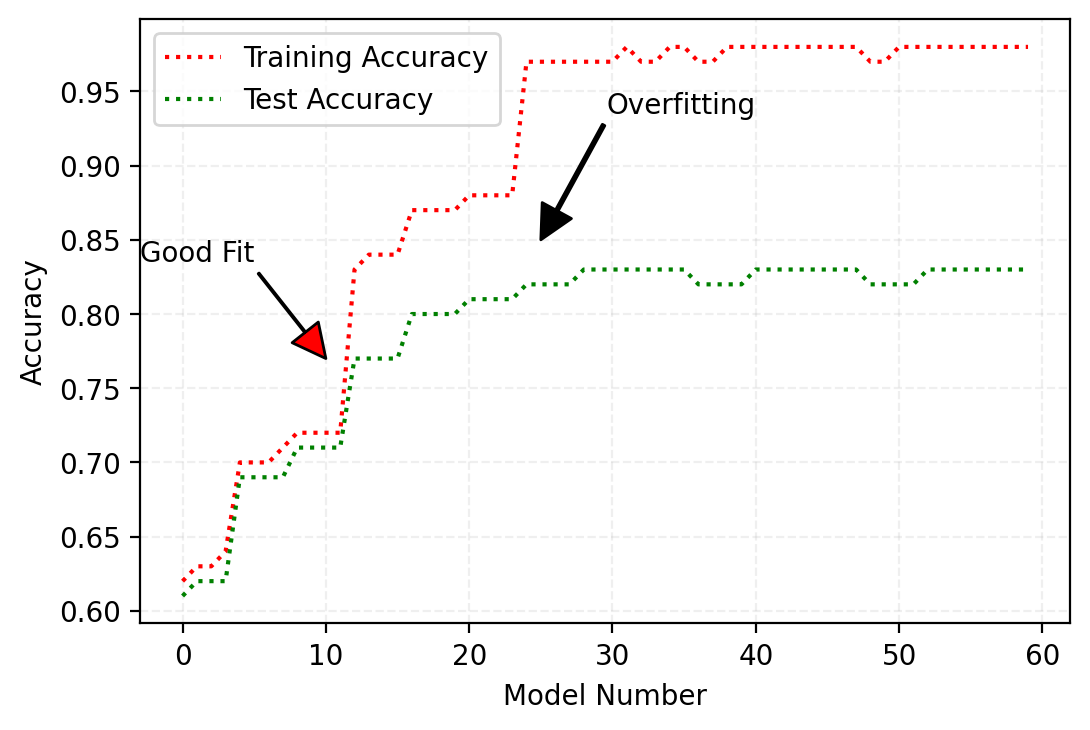

In [206]:
x_lb = list(range(len(train_scores)))
plt.figure(dpi=200)

plt.plot(x_lb, train_scores, 'r:', label="Training Accuracy")
plt.plot(x_lb, test_scores, 'g:', label="Test Accuracy")
plt.legend()
plt.xlabel("Model Number")
plt.ylabel("Accuracy")

ax = plt.gca()

ax.annotate('Overfitting', xy=(25, .85), xycoords='data',
           xytext=(40, 0.95),  arrowprops=dict(facecolor='black', width=1),
       horizontalalignment='right', verticalalignment='top',)

ax.annotate('Good Fit', xy=(10, .77), xycoords='data',
           xytext=(5, 0.85),  arrowprops=dict(facecolor='red', width=0.4),
       horizontalalignment='right', verticalalignment='top',)

plt.grid(ls='--', alpha=0.2)
plt.show()

### Random Forest Model also provides Feture importance

    so you can drop some of useless features using feature engineering

In [208]:
best_model = grid_search.best_estimator_

In [211]:
test_pred = best_model.predict(X_test_tr)
test_error = np.sqrt(mean_squared_error(y_test, test_pred))

In [213]:
print(f"Final Test Error : {test_error:0.2f}")
print(f"Final Test Accuracy: {r2_score(y_test, test_pred):0.2f}") # 83 / 85 -> 15 % Generalize 

Final Test Error : 44324.36
Final Test Accuracy: 0.85


In [214]:
best_model.feature_importances_ # Random Forest

array([5.77994913e-02, 5.91730117e-02, 3.49691090e-02, 1.78241212e-02,
       1.52210235e-02, 1.68997756e-02, 1.50483735e-02, 3.05741041e-01,
       1.91866625e-01, 1.01082026e-01, 9.42053686e-02, 8.89713870e-03,
       7.69048239e-02, 1.37190620e-04, 1.98852191e-03, 2.24235855e-03])

In [220]:
cat_tr = final_pipeline.named_transformers_['categorical pipeline']


['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [221]:
cat = list(cat_tr.categories_[0])
features = num_features + [ "longitute+latitude", "household_per_population", "bedrooms_per_rooms"] + cat

In [227]:
feature_importance  = [ (f, i) for f, i in zip(features, best_model.feature_importances_)]
feature_importance.sort(key=lambda x:x[1], reverse=True)

In [229]:
for feature, importance in feature_importance:
    print(f"{feature.upper():>30} = {importance:.2f}")

                 MEDIAN_INCOME = 0.31
            LONGITUTE+LATITUDE = 0.19
      HOUSEHOLD_PER_POPULATION = 0.10
            BEDROOMS_PER_ROOMS = 0.09
                        INLAND = 0.08
                      LATITUDE = 0.06
                     LONGITUDE = 0.06
            HOUSING_MEDIAN_AGE = 0.03
                   TOTAL_ROOMS = 0.02
                    POPULATION = 0.02
                TOTAL_BEDROOMS = 0.02
                    HOUSEHOLDS = 0.02
                     <1H OCEAN = 0.01
                    NEAR OCEAN = 0.00
                      NEAR BAY = 0.00
                        ISLAND = 0.00


    So you can drop all other categories except than INLAND 

#### Doubts

In [ ]:
from sklearnearnearnearnearnearnearnearnearnearn.model_selection import RandomizedSearchCV
from sklearn.liner_model import SGDRegressor

# eta = 0.01, 0.2, 0.5, 10, 0.89
# alpha = 0.1, 0.4, 0.8, 1
param_grid = [
    { 'eta': np.random.uniform(0, 10, 100),
      'alpha': np.radom.uniform(0, 1, 100)
    }
]

### Tomorrow 

    Gradient Descent Algorithm
    
    Regularization 
    
        Lasso Regression
        
        Ridge Regression
        
        Elastic Net
        
    Classification
    
        Logistic Regression